# **Introduction**

The field of artificial intelligence and LLMs entered our lives by a storm in the last year.Already it has a noticeable impact on many aspects, whether it's helping one with a code assignment or even opening new courses at the university. At the moment these models are not perfect, and much like in humans you can find they can exhibit different cognitive biases depending on various factors such as the database on which they were trained, the type of learning etc. (Koo et al. 2023)

A common bias observed in several models from different families is an overestimation of their performance and a preference for their own answers without any basis (ego-centricity and over-confidence) (Singh et al 2024).

Fortunately or not depending who you ask, one of the tasks in which we humans surprisingly surpass the LLMs is performing basic arithmetic operations such as addition and subtraction on large numbers.
(Nogueira, Jiang & Lin 2021)

# Choosing the models

**Phi-3-Mini-4K-Instruct** (microsoft/Phi-3-mini-4k-instruct):

**Family**: Phi-3, renowned for its robust reasoning skills, particularly in coding, mathematics, and logical problem-solving.

**Architecture**: This model is based on the Transformer architecture and has 3.8 billion parameters. It’s a “mini” variant with a 4K context length limit, meaning it can process up to 4,000 tokens at once. It has been fine-tuned using supervised learning and direct preference optimization to follow instructions and ensure safety.

**Reason for Choosing:** Phi-3-Mini-4K-Instruct was selected due to its exceptional reasoning abilities, despite its smaller size, making it ideal for environments with limited memory or computational resources.


**Meta-Llama-3-8B-Instruct** (meta-llama/Meta-Llama-3-8B-Instruct):

**Family**: Meta Llama 3, a suite of large language models specifically designed for dialogue applications.

**Architecture**: This model employs a Transformer-based architecture with 8 billion parameters. It has been optimized for dialogue through supervised fine-tuning (SFT) and reinforcement learning with human feedback (RLHF) to enhance its helpfulness and safety.

**Reason for Choosing**: Meta-Llama-3-8B-Instruct was chosen for its superior performance in dialogue tasks and its emphasis on safety and helpfulness, which are vital for our experiment examining potential biases.


**Mistral-7B-Instruct-v0.2** (mistralai/Mistral-7B-Instruct-v0.2):

**Family**: Mistral, a family of large language models recognized for their ability to handle long context windows.
Architecture: This model is based on the Transformer architecture and has 7 billion parameters. It features a 32k context window, enabling it to effectively manage longer text sequences. It is instruction-tuned, allowing it to follow instructions and perform a variety of tasks.
**Reason for Choosing:** Mistral-7B-Instruct-v0.2 was chosen for its capability to process long text sequences, which could be advantageous for complex arithmetic reasoning or word problems in the future.


# Benchmarking the models arithmatic capabilties

before attempting to find biases the models answer I wanted to check the preformance of the models on the task of preforming basic addition and subtraction problems. In the following graph we can see how each of the model preformed with random questions with the format

"what is {X} {plus/minus} {Y}?"

and a leading context prompt:

"""You are a helpful assistant who excels at arithmetic.
  You are given a simple math problem involving addition or subtraction of two numbers.
  Your task is to solve the problem and provide only the numerical result as the answer.
  Do not include any additional text or explanations, just the final answer."""


the models were tested for numbers with [3,4,5,6,7,8,9,12] digits


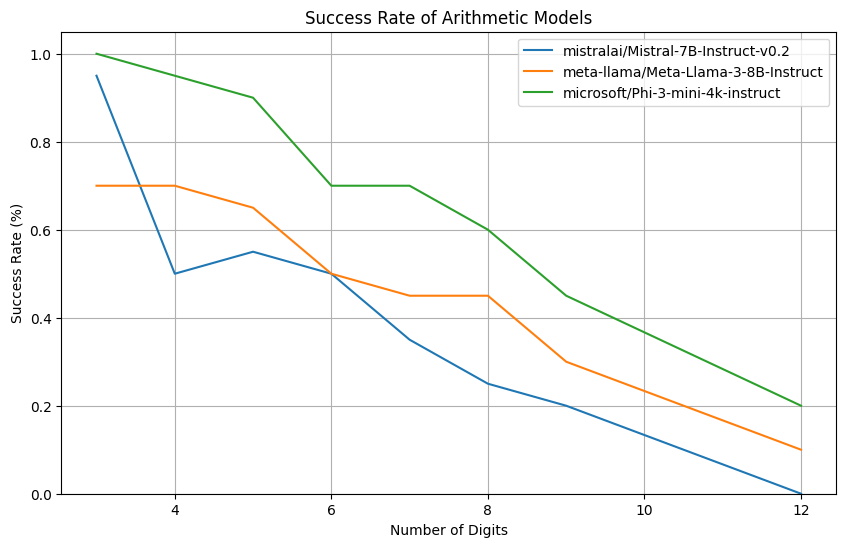

# Benchmarking the models Over and Under Confidence biases

**Overconfidence and Underconfidence in LLMs**: Large language models, despite their impressive capabilities, can exhibit cognitive biases similar to humans. Two such biases are overconfidence and underconfidence. Overconfidence bias refers to the tendency of a model to overestimate the accuracy of its own outputs, even when they are incorrect.Simillarly underconfidence bias occurs when a model underestimates its abilities and expresses low confidence even when its answers are correct. These biases can impact the reliability and trustworthiness of LLMs in various applications.

In order to investigate these biases in LLMs, a benchmark was chosen that focuses on basic arithmetic tasks. Arithmetic problems provide a well-defined ground truth (correct answer) and are relatively simple for humans to evaluate, making them suitable for assessing model performance and confidence levels.

**How it works**: The models are presented with series of arithmetic questions (addition and subtraction) with varying difficulty levels (number of digits). After the model provides an answer, it is asked to assess its own confidence in the correctness of its response. The benchmark tracks the number of times the model answers correctly and incorrectly, as well the number of times the model was sure in its answer when it was wrong and vice versa when the model was correct but assesed that his answered the question incorrectly.

# Benchmark results

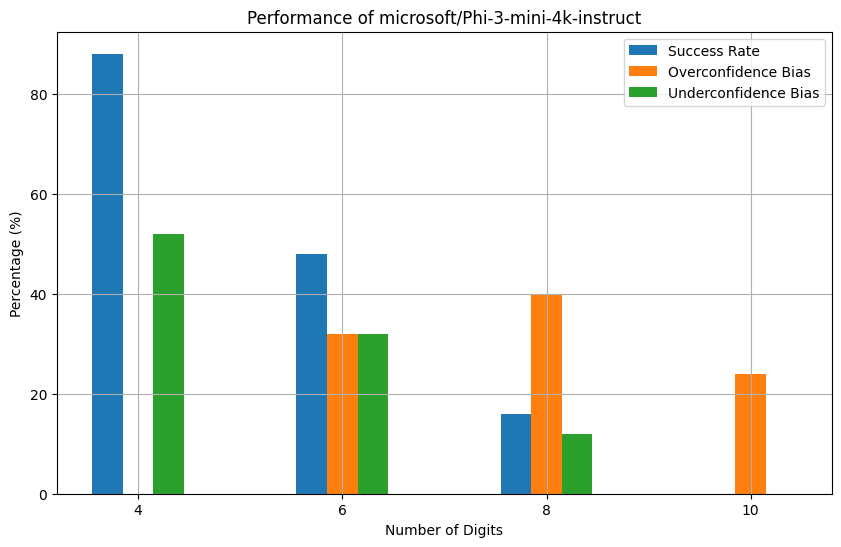

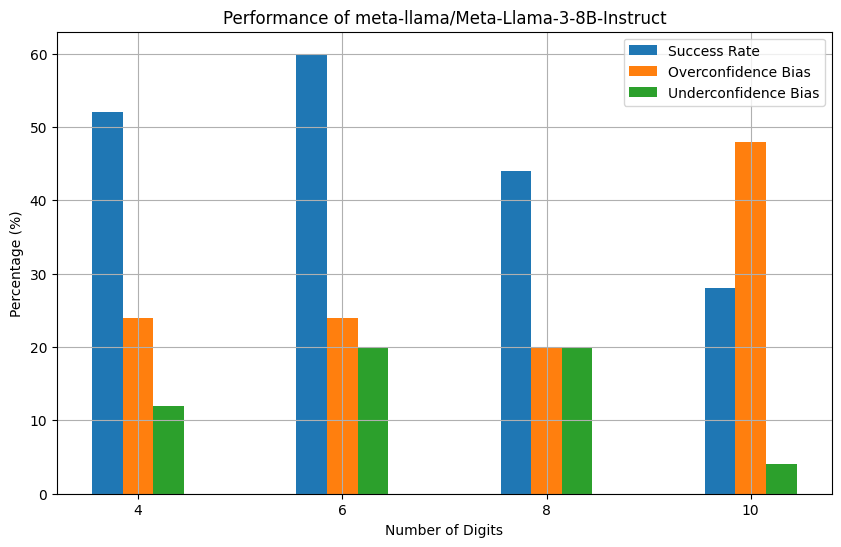
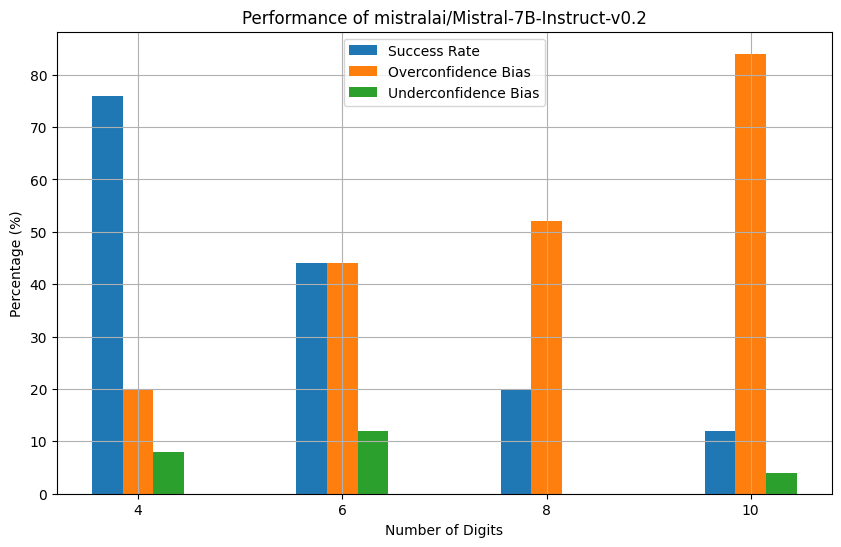

# De-biasing the Models

In order to de-bias the models I used prompt engneering. prompt engennering has been shown to be an effective tool for de-biasing, especially in zero-shot tasks (Chisca et al., LTEDI-WS 2024). I used two methods in the prompt



*   emphesazing to the model to recheck itself and evalute how confident it is with the previous answer.

*   adding an option for MAYBE beside YES and NO that makes the model now from a list of options instead of a binary choice for the amount of confidance in it's answer



# De-biasing results

)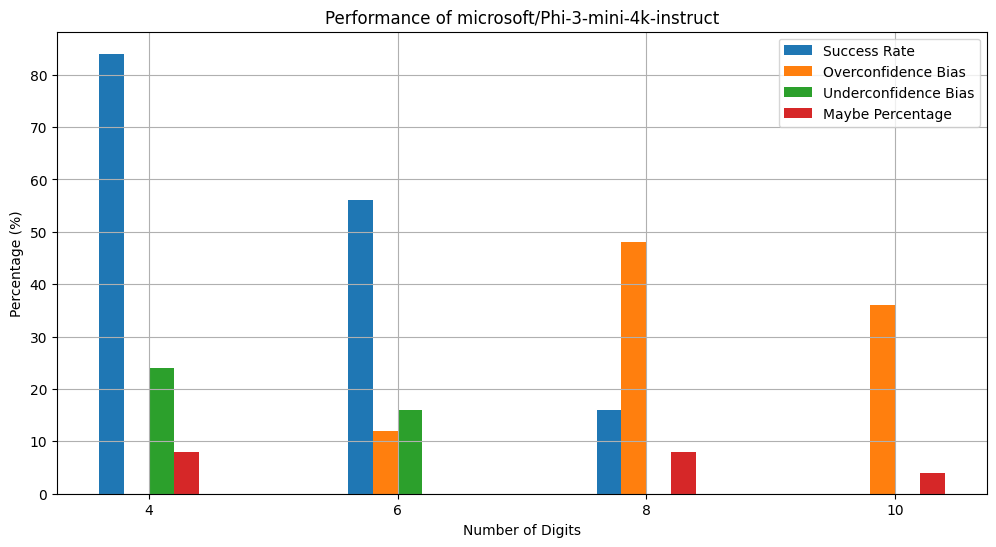

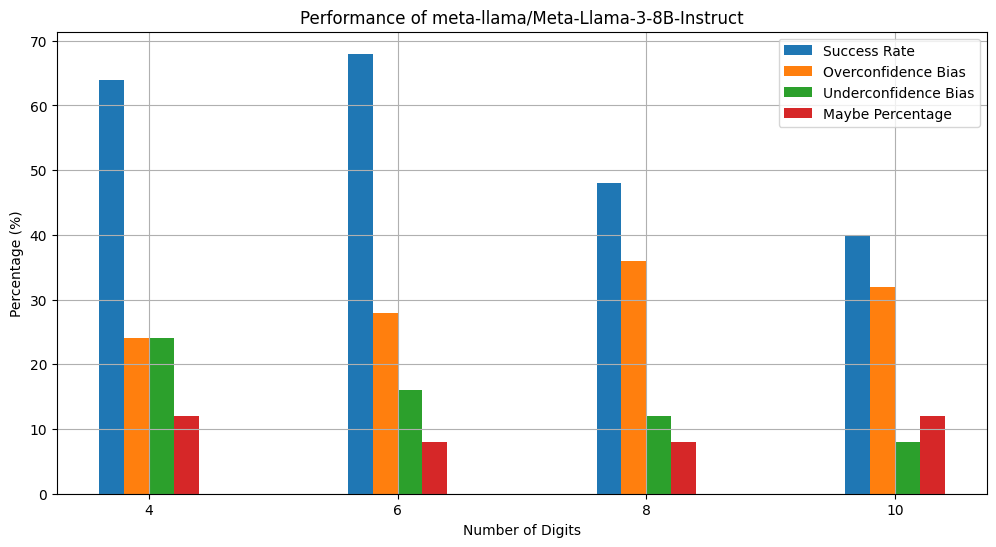

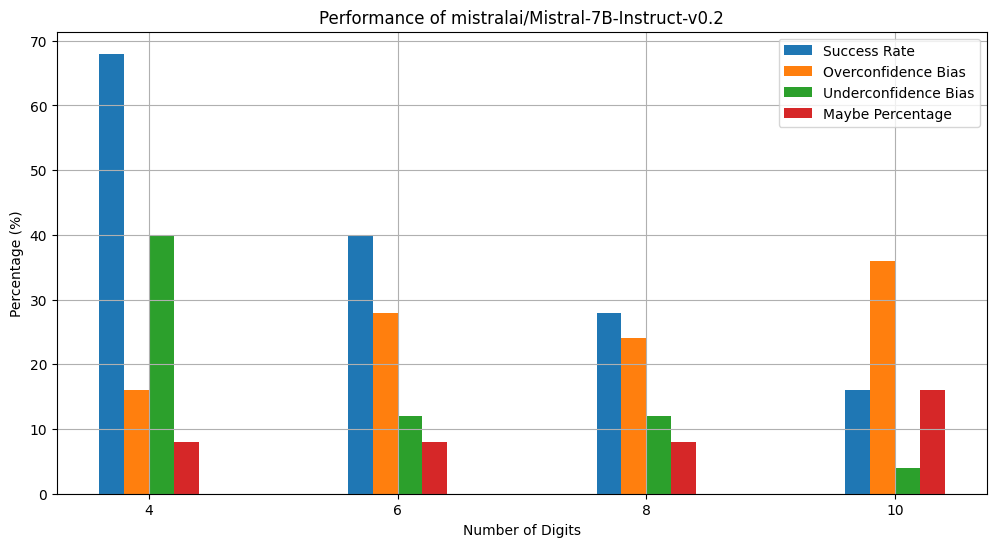

The results show that the de-biasing had an effect on the confidance level of the models. For Mistral and Llama there is an improvment in the overconfidance bias across all results, especially in the tasks where the models preformaces were low. for Phi we can see an improvement mostly in the underconfidance bias.

# Refrences

Koo, R., Lee, M., Raheja, V., Park, J. I., Kim, Z. M., & Kang, D. (2023). Benchmarking cognitive biases in large language models as evaluators. arXiv preprint arXiv:2309.17012.

Singh, A. K., Lamichhane, B., Devkota, S., Dhakal, U., & Dhakal, C. (2024). Do Large Language Models Show Human-like Biases? Exploring Confidence—Competence Gap in AI. Information, 15(2), 92.

Nogueira, R., Jiang, Z., & Lin, J. (2021). Investigating the limitations of transformers with simple arithmetic tasks. arXiv preprint arXiv:2102.13019.

Chisca, A. V., Rad, A. C., & Lemnaru, C. (2024, March). Prompting Fairness: Learning Prompts for Debiasing Large Language Models. In Proceedings of the Fourth Workshop on Language Technology for Equality, Diversity, Inclusion (pp. 52-62).‏

In [1]:
!pip install num2words
!pip install -q -U bitsandbytes
# !pip install -q -U git+https://github.com/huggingface/transformers.git
!pip install -q -U git+https://github.com/huggingface/peft.git
!pip install -q -U git+https://github.com/huggingface/accelerate.git

import accelerate
import bitsandbytes
import peft
from transformers import (pipeline, BitsAndBytesConfig,
                          AutoModelForCausalLM,
                          BertForQuestionAnswering,
                          AutoModelForQuestionAnswering,
                          BartTokenizer, BartForQuestionAnswering,
                          AutoTokenizer, XLNetTokenizer,
                          XLNetForQuestionAnswering, T5ForQuestionAnswering, BartForCausalLM,
                          T5Tokenizer)
from num2words import num2words
import torch
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

print("import success")

  Using cached docopt-0.6.2.tar.gz (25 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13822 sha256=4046b84f3e16ae9286498361d2d45b910bee9880f852ba4a7c58996d024049d0
  Stored in directory: c:\users\yotam\appdata\local\pip\cache\wheels\1a\bf\a1\4cee4f7678c68c5875ca89eaccf460593539805c3906722228
Successfully built docopt


C:\Users\yotam\.conda\envs\LLM_Debiasing\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.


ModuleNotFoundError: No module named 'pandas'

In [2]:
# choosing the models

# DISTILBERT_MODEL = 'distilbert-base-uncased-distilled-squad'

# weak light models I spent way too much trying to work with only to get gibbrish answers
# from them each time
ROBERTA_MODEL = "deepset/roberta-base-squad2"
XLNET_MODEL = 'xlnet-base-cased'
T5_MODEL = "google-t5/t5-base"

# strong state of the art models
PHI_MODEL = "microsoft/Phi-3-mini-4k-instruct"
LLAMA_MODEL = "meta-llama/Meta-Llama-3-8B-Instruct"
MISTRAL_MODEL = "mistralai/Mistral-7B-Instruct-v0.2"


# model_names = [ROBERTA_MODEL, BART_MODEL, XLNET_MODEL, T5_MODEL]
model_names = [PHI_MODEL, MISTRAL_MODEL, LLAMA_MODEL, ]

print(torch.cuda.is_available())

False


In [3]:
MAX_NEW_TOKENS = 128



None


loading the models using 4bit quantization in order to make them more lighweight

In [4]:
bnb_config = BitsAndBytesConfig(
    load_in_4bit= True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
    )

device = "cuda:0" if torch.cuda.is_available() else "cpu"


def load_model(model_name):
    """Loads a model and its tokenizer based on the model name."""
    print(f"loading model: {model_name}")
    if(model_name == T5_MODEL):
          model = T5ForQuestionAnswering.from_pretrained(model_name)
          tokenizer = T5Tokenizer.from_pretrained(model_name)
    elif(model_name == XLNET_MODEL):
        model = XLNetForQuestionAnswering.from_pretrained(model_name)
        tokenizer = XLNetTokenizer.from_pretrained(model_name)
    elif(model_name == ROBERTA_MODEL):
        model = AutoModelForQuestionAnswering.from_pretrained(model_name)
        tokenizer = AutoTokenizer.from_pretrained(model_name)
    elif(model_name == PHI_MODEL):
      model = AutoModelForCausalLM.from_pretrained(model_name, trust_remote_code=True,  quantization_config = bnb_config, device_map=device, attn_implementation='eager')
      tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
    elif(model_name == LLAMA_MODEL):
      tokenizer = AutoTokenizer.from_pretrained(model_name)
      model = AutoModelForCausalLM.from_pretrained(model_name,quantization_config = bnb_config, device_map=device)
    elif(model_name == MISTRAL_MODEL):
        model = AutoModelForCausalLM.from_pretrained(model_name, quantization_config = bnb_config, device_map=device)
        tokenizer = AutoTokenizer.from_pretrained(model_name)
    else:
      raise ValueError("Invalid model name")
    print("model and tokeniser generated successfuly")
    return model, tokenizer


def delete_model(model, tokenizer):
    """Deletes a model and its tokenizer and frees up memory."""
    print("deleting model from memory")
    del model
    del tokenizer
    gc.collect()
    torch.cuda.empty_cache()
    print("memory cleared")

In [5]:
# loading the models



phi_model, phi_tokenizer = load_model(PHI_MODEL)
llama_model, llama_tokenizer = load_model(LLAMA_MODEL)
mistral_model, mistral_tokenizer = load_model(MISTRAL_MODEL)


MODELS = [(phi_model, phi_tokenizer, PHI_MODEL),(llama_model, llama_tokenizer, LLAMA_MODEL), (mistral_model, mistral_tokenizer, MISTRAL_MODEL)]



loading model: microsoft/Phi-3-mini-4k-instruct


A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-4k-instruct:
- configuration_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-4k-instruct:
- modeling_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
`flash-attention` package not found, consider installing for better performance: No module named 'flash_attn'.
Current `flash-attention` does not support `window_size`. Either upgrade or use `attn_implementation='eager'`.
CUDA is required but not available for bitsandbytes. Please consider installing the multi-platform enabled version of bitsandbytes, which is currently a work in progress. Please check currently supported pla

RuntimeError: CUDA is required but not available for bitsandbytes. Please consider installing the multi-platform enabled version of bitsandbytes, which is currently a work in progress. Please check currently supported platforms and installation instructions at https://huggingface.co/docs/bitsandbytes/main/en/installation#multi-backend

In [6]:
def generate_question(digits):
  """
  creates a single question, and it's answer for two random numbers with certain
  amount of digits
  """
  num1 = np.random.randint(10**(digits-1), 10**(digits))
  num2 = np.random.randint(10**(digits-1), 10**(digits))
  operator = np.random.choice(["+", "-"])
  if operator == "+":
    answer = num1 + num2
  else:
    answer = num1 - num2
  question = f"what is {(num1)} {operator} {(num2)}?"
  # question = f"{num1} {operator} {num2}?"
  return question,answer

def create_questions_batch(batch_size, digits):
  questions = []
  answers = []
  for _ in range(batch_size):
    question, answer = generate_question(digits)
    questions.append(question)
    answers.append(answers)
  return questions, answers



In [9]:

context = """You are a helpful assistant who excels at arithmetic.
  You are given a simple math problem involving addition or subtraction of two numbers.
  Your task is to solve the problem and provide only the numerical result as the answer.
  Do not include any additional text or explanations, just the final answer."""



def answer_question_llama(model, tokenizer, question, context=context):
  """Generates an answer using Meta Llama 3 with chat template."""
  messages = [
      {"role": "system", "content": system_context},
      {"role": "user", "content": question},
  ]
  input_ids = tokenizer.apply_chat_template(messages, return_tensors="pt").to(device)
  attention_mask = input_ids['attention_mask']
  with torch.no_grad():

    output = model.generate(input_ids, max_new_tokens=128,attention_mask =attention_mask, num_return_sequences=1)

  answer = tokenizer.decode(output[0], skip_special_tokens=True)
  # Extract answer after the last user message delimiter
  # answer = answer.split("</s>")[-1].strip()
  return answer.strip()

def answer_question_phi(model, tokenizer, question, system_context=context):
  """Generates an answer using Phi-3 with chat template."""
  messages = [
      {"role": "system", "content": system_context},
      {"role": "user", "content": question},
  ]
  input_ids = tokenizer.apply_chat_template(messages, return_tensors="pt").to(device)

  with torch.no_grad():
    output = model.generate(input_ids, max_new_tokens=128, num_return_sequences=1)

  answer = tokenizer.decode(output[0], skip_special_tokens=True)
  # answer = answer.split("<|end|>")[-1].split("<|assistant|>")[-1].strip()
  return answer

def answer_question_mistral(model, tokenizer, question, system_context=context):
  """Generates an answer using Mistral with chat template."""
  messages = [
      {"role": "system", "content": system_context},
      {"role": "user", "content": question},
  ]

  input_ids = tokenizer.apply_chat_template(messages, return_tensors="pt").to(device)


  with torch.no_grad():
    attention_mask = input_ids['attention_mask']
    output = model.generate(input_ids, attention_mask=attention_mask, max_new_tokens=128, num_return_sequences=1)

  answer = tokenizer.decode(output[0], skip_special_tokens=True)
  answer = answer.split("[/INST]")[-1].split("")[0].strip()
  return str(answer)


def answer_arithmetic_question(model, tokenizer, model_name, question, system_context=context):
  if(model_name == PHI_MODEL):
    return answer_question_phi(model, tokenizer, question, context)
  elif(model_name == LLAMA_MODEL):
    return answer_question_llama(model, tokenizer, question, context)
  elif(model_name == MISTRAL_MODEL):
    return answer_question_mistral(model, tokenizer, question, context)
  else:
    raise ValueError("Invalid model name")



Running the benchmark for the models arithmatic capabilities as function of the amount of digits in a number

In [10]:
import re

def number_in_answer(n, answer):
  """Checks if the number n (as an integer) is present as a word within the answer string."""
  number_pattern = str(n)
  return bool(re.search(number_pattern, answer))

def find_model_success_rate(model, tokenizer, model_name, num_of_questions, digits, system_context=context):
  """checks the precentage of questions a model answers correctly for numbers
  with certain amount of digits"""
  right_answers = 0
  for i in range(num_of_questions):
    question, answer = generate_question(digits)
    model_answer = answer_arithmetic_question(model, tokenizer, model_name, question, context)
    if( number_in_answer(answer,model_answer)):
      right_answers += 1
  print(f"SUCESS RATE: {100 * (right_answers / num_of_questions)}% The model answered correctly {right_answers} out of {num_of_questions} for {digits} digits")
  return right_answers / num_of_questions

def test_models_arithmatics(models ,num_of_questions, digit_list):
  """
  check the success rate of each of the models for all the digits from the
  digit list
  """
  results = {model_name : [] for model_name in model_names}
  print(f"running tests for {digit_list} for {num_of_questions} questions")
  for model, tokenizer, model_name in models:
    print(f"checking results for {model_name}")
    for digit in digit_list:
        print(f"starting tests for {digit} digits")
        sr = find_model_success_rate(model, tokenizer, model_name, num_of_questions, digit)
        results[model_name].append(sr)
  return results



In [ ]:
digit_list = [3,4,5,6,7,8,9,12]
num_of_questions = 20
results = test_models_arithmatics(MODELS, num_of_questions,digit_list)
print(results)



In [12]:
# results for the digit list [3,4,5,6,9,12] with 10 questions
results_10q = {MISTRAL_MODEL: [1.0, 0.8, 0.4, 0.2, 0.2, 0.0],
               LLAMA_MODEL: [0.9, 0.9, 0.6, 0.7, 0.5, 0.0],
               PHI_MODEL: [1.0, 1.0, 0.8, 1.0, 0.7, 0.1]}

# results for the digit list [3,4,5,6,7,8,9,12] with 20 questions
results_20q = {MISTRAL_MODEL: [0.95, 0.5, 0.55, 0.5, 0.35, 0.25, 0.2, 0.0],
               LLAMA_MODEL: [0.7, 0.7, 0.65, 0.5, 0.45, 0.45, 0.3, 0.1],
               PHI_MODEL: [1.0, 0.95, 0.9, 0.7, 0.7, 0.6, 0.45, 0.2]}



In [ ]:
def plot_model_results(results, digit_list):
  """
  Plots success rate vs number of digits for each model in the results dictionary.

  """

  # Create the plot
  plt.figure(figsize=(10, 6))
  for model_name, success_rates in results.items():
    plt.plot(digit_list, success_rates, label=model_name)  # Plot success rate vs digit length

  # Set plot labels and title
  plt.xlabel("Number of Digits")
  plt.ylabel("Success Rate (%)")
  plt.title("Success Rate of Arithmetic Models")
  plt.legend()
  plt.grid(True)
  plt.ylim(0, 1.05)  # Set y-axis limits to ensure all values are displayed

  # Display the plot
  plt.show()

In [ ]:
plot_model_results(results_20q,[3,4,5,6,7,8,9,12])


# Creating the benchmark for the models overconfidence biases

In [13]:
def answer_question(model, tokenizer, model_name, question,context=context):
  """
  generates a model response to a question from the user based on the context
  """
  # Create a pipeline
  nlp = pipeline('text-generation', model=model, tokenizer=tokenizer)

  # Generate the answer
  input_text = context + "\n" + question
  answer = nlp(input_text, max_new_tokens=MAX_NEW_TOKENS, eos_token_id=tokenizer.eos_token_id, do_sample=True)[0]['generated_text']

  answer = answer.replace(context, '').replace(question, '').strip()

  return answer





In [16]:
 = "Respond ONLY with YES or NO without any further explanation if your answer was correct or incorrect."

def get_model_confidance(model, tokenizer, model_name, question, model_answer, confiedence_question=confiedence_question):

  context = f"You were prevoisly asked to solve an arithmatic question.\nYour answer to the question: '{question}' was: '{model_answer}'"
  # confiedence_question = "Respond ONLY with YES or NO without any further explanation if your answer was correct or incorrect."

  model_answer = answer_question(model, tokenizer, model_name,confiedence_question, context).upper()
  # check if the model thinks he answered correcly

  return model_answer


def check_overconfidence(model_confidence):
  """
  Checks if the model's confidence indicates overconfidence based on the order of "YES" and "NO".
  """
  model_confidence = model_confidence.upper()  # Convert to uppercase

  # Find the positions of "YES" and "NO"
  yes_index = model_confidence.find("YES")
  no_index = model_confidence.find("NO")

  if yes_index != -1 and (no_index == -1 or yes_index < no_index):
    return "YES"  # "YES" is found and comes before "NO" or "NO" is not found
  elif no_index != -1:
    return "NO"  # "NO" is found (and comes before "YES" or "YES" is not found)
  else:
    return None  # Neither "YES" nor "NO" is found



In [ ]:
l = ["NO dfdfdf sss", "NO YES", "YES gfgfgfg rrrrr NO", "YES  fff", " ddddd"]

for i in l:
  print(check_overconfidence(i))


In [18]:

def benchmark_model_bias(model, tokenizer, model_name, digits, num_trials=100):
  """
  Analyzes a model's overconfidence bias.

  Args:
      model: The loaded LLM model object.
      tokenizer: The tokenizer associated with the model.
      model_name: The name of the model.
      num_trials: The number of question trials.

  Returns:
      bias_score: The overconfidence bias score as a percentage.
  """
  print(f"Running Over Connfidence test for {model_name.split('-')[0].upper()}")
  right_answers = 0
  wrong_but_confident = 0
  right_but_under_confident = 0

  for _ in range(num_trials):
    question, true_answer = generate_question(digits)
    model_answer = answer_question(model, tokenizer, model_name, question)
    is_correct = number_in_answer(true_answer, model_answer)

    if(is_correct):
      right_answers += 1

    model_response = get_model_confidance(model, tokenizer, model_name, question, model_answer)
    model_confidence = check_overconfidence(model_response)

    print(f"The model answer for the question: {question} was {is_correct}")
    print(f"the model said his answer was {model_confidence}")

    if not is_correct and (model_confidence == "YES"):
      wrong_but_confident += 1

    if is_correct and (model_confidence == "NO"):
      right_but_under_confident += 1


  success_rate = 100 * (right_answers / num_trials)
  over_confidence_bias = 100 * (wrong_but_confident / num_trials)
  under_confidence_bias = 100 * (right_but_under_confident / num_trials)
  print(f"Model: {model_name.split('-')[0]}")
  print(f"The model answer correctly {success_rate} of the questions")
  print(f"Model: {model_name}, Overconfidence Bias: {over_confidence_bias:.2f}% Underconfidence Bias: {under_confidence_bias:.2f}%")
  return [success_rate, over_confidence_bias, under_confidence_bias]

In [19]:
# running the benchmarks for each model, due to time limits i tested for only 25 trials per digit, that can be changed to 100

def run_benchmark(models=MODELS, digits=[4, 6, 8, 10], num_trials=25):
  """
  Runs the benchmark and collects data for each model and digit combination.
  """
  results_data = []
  for model, tokenizer, model_name in models:
    print(f"Starting benchmarking for {model_name}")
    for digit in digits:
      print(f"running {num_trials} for the digit {digit}")
      performance_data = benchmark_model_bias(model, tokenizer, model_name, digit, num_trials)
      success_rate, overconfidence_bias, underconfidence_bias = performance_data
      results_data.append([model_name, digit, success_rate, overconfidence_bias, underconfidence_bias])

  results_df = pd.DataFrame(results_data, columns=["Model", "Digits", "Success Rate", "Overconfidence Bias", "Underconfidence Bias"])
  return results_df

In [ ]:
#Running the bunchmark and gathering the data
benchmark_df = run_benchmark()

In [ ]:
def plot_model_performance(results_df):
  """
  Plots separate graphs for each model with success rate, overconfidence, and underconfidence.

  Args:
      results_df: The pandas DataFrame containing the benchmark results.
  """
  for model_name in results_df["Model"].unique():
    model_data = results_df[results_df["Model"] == model_name]
    digits = model_data["Digits"]
    success_rate = model_data["Success Rate"]
    overconfidence = model_data["Overconfidence Bias"]
    underconfidence = model_data["Underconfidence Bias"]

    width = 0.3  # Width of the bars

    # Create the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(digits - width, success_rate, width, label="Success Rate")
    plt.bar(digits, overconfidence, width, label="Overconfidence Bias")
    plt.bar(digits + width, underconfidence, width, label="Underconfidence Bias")

    # Set plot labels and title
    plt.xlabel("Number of Digits")
    plt.ylabel("Percentage (%)")
    plt.title(f"Performance of {model_name}")
    plt.xticks(digits)
    plt.legend()
    plt.grid(True)

    # Display the plot
    plt.show()



In [ ]:
# Ploting the graph
plot_model_performance(benchmark_df)

In [29]:
# De-biasing through prompt engeneering

# debiasing_prompt = """Please take a moment to double-check your previous answer to the math problem.
# Carefully consider the numbers and the operation involved. Based on your reconsideration,
#  how confident are you that your answer is correct? Please respond only with:
#  (YES, NO, MAYBE)
# """
# * **YES:** If you are very sure your answer is correct after re-evaluating.
# * **NO:** If you realize your answer is likely incorrect after re-evaluating.
# * **MAYBE:** If you are still unsure about the correctness of your answer even after re-evaluating.""")


debiasing_prompt ="""
You were given before an arithmatic problem and you should now respond if you gave the correct answer.
 If you are sure your answer is correct, respond with 'YES'.
 If you are unsure, respond with 'MAYBE'.
 If you are sure your answer is wrong, respond with 'NO'.
 Please respond only with 'YES', 'NO', or 'MAYBE'"""

def get_model_confidance(model, tokenizer, model_name, question, model_answer, confiedence_question=debiasing_prompt):

  confiedence_question = debiasing_prompt
  context = f"Your answer to the question: '{question}' was: '{model_answer}'.\nPlease reconsider your solution and make sure that you are confident in your answer."
  # confiedence_question = "Respond ONLY with YES or NO without any further explanation if your answer was correct or incorrect."

  model_answer = answer_question(model, tokenizer, model_name,confiedence_question, context)
  # check if the model thinks he answered correcly

  return model_answer



def improved_check_confidence(model_confidence):
  """
  Checks for overconfidence considering "YES", "NO", and "MAYBE".
  """
  model_confidence = model_confidence.upper()  # Convert to uppercase
  # Find the positions of "YES", "NO", and "MAYBE"
  yes_index = model_confidence.find("YES")
  no_index = model_confidence.find("NO")
  maybe_index = model_confidence.find("MAYBE")

  if maybe_index != -1:
    return "MAYBE"  # Prioritize "MAYBE" if it's present

  if yes_index != -1 and (no_index == -1 or yes_index < no_index):
    return "YES"  # "YES" comes before "NO" or "NO" is not found
  elif no_index != -1:
    return "NO"   # "NO" comes before "YES" or "YES" is not found
  else:
    return None    # None of the keywords found



In [30]:

def benchmark_model_debias(model, tokenizer, model_name, digits, num_trials=100):
  """
  Analyzes model bias with "MAYBE" and debiasing prompt.
  """
  print(f"Running Bias test for {model_name.split('-')[0].upper()}")
  right_answers = 0
  wrong_but_confident = 0
  right_but_underconfident = 0
  maybe_count = 0

  for _ in range(num_trials):


    question, true_answer = generate_question(digits)
    model_answer = answer_question(model, tokenizer, model_name, question)
    is_correct = number_in_answer(true_answer, model_answer)

    if(is_correct):
      right_answers += 1

    model_response = get_model_confidance(model, tokenizer, model_name, question, model_answer, confiedence_question = debiasing_prompt)
    model_confidence = check_overconfidence(model_response)

    print(f"The model answer for the question: {question} was {is_correct}")
    print(f"the model said his answer was: {model_confidence}")

    if not is_correct and (model_confidence == "YES"):
      wrong_but_confident += 1

    elif is_correct and (model_confidence == "NO"):
      right_but_underconfident += 1

    elif model_confidence == "MAYBE" or model_confidence== None:
      maybe_count += 1



  success_rate = 100 * (right_answers / num_trials)
  over_confidence_bias = 100 * (wrong_but_confident / num_trials)
  under_confidence_bias = 100 * (right_but_underconfident / num_trials)
  maybe_percentage = 100 * (maybe_count / num_trials)

  print(f"Model: {model_name.split('-')[0]}")
  print(f"The model answer correctly {success_rate} of the questions")
  print(f"Model: {model_name}, Overconfidence Bias: {over_confidence_bias:.2f}% Underconfidence Bias: {under_confidence_bias:.2f}% Maybe: {maybe_percentage:.2f}%")
  return [success_rate, over_confidence_bias, under_confidence_bias, maybe_percentage]



def run_debiasing_benchmark(models=MODELS, digits=[4, 6, 8, 10], num_trials=25):
  """
  Runs the benchmark and collects data with "MAYBE" percentage.
  """
  results_data = []
  for model, tokenizer, model_name in models:
    print(f"Starting benchmarking for {model_name}")
    for digit in digits:
      print(f"running {num_trials} for the digit {digit}")
      performance_data = benchmark_model_debias(model, tokenizer, model_name, digit, num_trials)
      success_rate, overconfidence_bias, underconfidence_bias, maybe_precentage = performance_data
      results_data.append([model_name, digit, success_rate, overconfidence_bias, underconfidence_bias, maybe_precentage])

  results_df = pd.DataFrame(results_data, columns=["Model", "Digits", "Success Rate", "Overconfidence Bias", "Underconfidence Bias", "Maybe Percentage"])
  return results_df

In [ ]:
for m,t,mn in MODELS:
  q,a = generate_question(10)
  ma = answer_question(model,tokenizer,model_name,q)
  is_correct = number_in_answer(a,ma)
  mr= get_model_confidance(m,t,m,q,ma)
  print(f" {'_' * 30} \n{mn}\nANSWER CORRECT: {is_correct} RESPONSE: {improved_check_confidence(mr)}\n{mr}")

In [ ]:
debias_df = run_debiasing_benchmark()

In [ ]:
  """
  Plots separate graphs for each model with success rate, overconfidence,
  underconfidence, and maybe percentage.
  """
  for model_name in results_df["Model"].unique():
    model_data = results_df[results_df["Model"] == model_name]
    digits = model_data["Digits"]
    success_rate = model_data["Success Rate"]
    overconfidence = model_data["Overconfidence Bias"]
    underconfidence = model_data["Underconfidence Bias"]
    maybe_percentage = model_data["Maybe Percentage"]

    width = 0.2  # Width of the bars

    # Create the bar chart with 4 bars per digit
    plt.figure(figsize=(12, 6))  # Adjust figure size as needed
    plt.bar(digits - 1.5*width, success_rate, width, label="Success Rate")
    plt.bar(digits - 0.5*width, overconfidence, width, label="Overconfidence Bias")
    plt.bar(digits + 0.5*width, underconfidence, width, label="Underconfidence Bias")
    plt.bar(digits + 1.5*width, maybe_percentage, width, label="Maybe Percentage")

    # Set plot labels and title
    plt.xlabel("Number of Digits")
    plt.ylabel("Percentage (%)")
    plt.title(f"Performance of {model_name}")
    plt.xticks(digits)
    plt.legend()
    plt.grid(True)

    # Display the plot
    plt.show()
##%%
plot_debiasing_benchmark_results(debias_df)
